In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [80]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [39]:
stocks = ['VMART.NS', 'DMART.NS', 'TRENT.NS']

In [40]:
data = yf.download(stocks, start= '2023-12-01' , end='2024-12-01')['Adj Close']

[*********************100%%**********************]  3 of 3 completed


In [41]:
data

Ticker,DMART.NS,TRENT.NS,VMART.NS
Date,,,
2023-12-01,3988.399902,2805.774902,1781.150024
2023-12-04,3967.100098,2814.918701,1833.199951
2023-12-05,4039.550049,2872.779053,1845.949951
2023-12-06,4137.149902,2865.883789,1808.000000
2023-12-07,4115.450195,2843.249268,1796.849976
...,...,...,...
2024-11-25,3621.050049,6774.950195,3863.600098
2024-11-26,3659.149902,6669.350098,3781.750000
2024-11-27,3661.250000,6845.100098,3977.949951


In [42]:
data.head()

Ticker,DMART.NS,TRENT.NS,VMART.NS
Date,,,
2023-12-01,3988.399902,2805.774902,1781.150024
2023-12-04,3967.100098,2814.918701,1833.199951
2023-12-05,4039.550049,2872.779053,1845.949951
2023-12-06,4137.149902,2865.883789,1808.000000
2023-12-07,4115.450195,2843.249268,1796.849976


In [43]:
returns = data.pct_change().dropna()

In [44]:
returns.head()

Ticker,DMART.NS,TRENT.NS,VMART.NS
Date,,,
2023-12-04,-0.005340,0.003259,0.029223
2023-12-05,0.018263,0.020555,0.006955
2023-12-06,0.024161,-0.002400,-0.020558
2023-12-07,-0.005245,-0.007898,-0.006167
2023-12-08,-0.010886,-0.001371,-0.009378


In [45]:
weights = np.array([0.4, 0.3, 0.3])

In [46]:
portfolio_returns = returns.dot(weights)

In [47]:
expected_return = portfolio_returns.mean()

In [48]:
cov_matrix = returns.cov()
portfolio_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
portfolio_volatility = np.sqrt(portfolio_variance)

In [49]:
print(f"Expected Daily Retun: {expected_return:.4f}")
print(f"Portfolio Variance: {portfolio_variance:.6f}")
print(f"Portfolio Volatility (Risk) : {portfolio_volatility:.4f}")

Expected Daily Retun: 0.0022
Portfolio Variance: 0.000198
Portfolio Volatility (Risk) : 0.0141


In [50]:
VaR_95 = np.percentile(portfolio_returns, 5)

print(f"Value at Risk (5%): {VaR_95:.4F}")

Value at Risk (5%): -0.0172


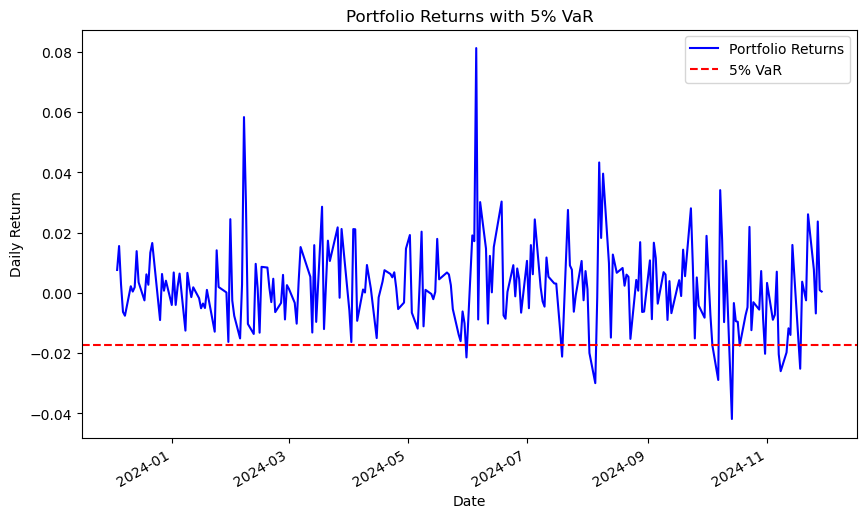

In [53]:
portfolio_returns.plot(figsize=(10, 6), color='blue' , label='Portfolio Returns')
plt.axhline(y=VaR_95, color='red', linestyle='--', label='5% VaR')
plt.title('Portfolio Returns with 5% VaR')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()

In [54]:
from datetime import datetime
%matplotlib inline

In [55]:
stocksymbols = ['VMART.NS', 'DMART.NS', 'TRENT.NS']

In [56]:
stockStartDate = "2013-01-01"

In [57]:
today = datetime.today().strftime("%Y-%m-%d")
print(today)

2024-12-11


In [58]:
numAssets = len(stocksymbols)
print("You have " + str(numAssets) +  " assets in your portfolio.")

You have 3 assets in your portfolio.


In [59]:
def getmyPortfolio(stocks, start, end, col="Adj Close"):
    data = yf.download(stocks, start=start, end=end)[col].dropna()
    return data

In [60]:
my_stocks = getmyPortfolio(stocksymbols, stockStartDate, today)
my_stocks

[*********************100%%**********************]  3 of 3 completed


Ticker,DMART.NS,TRENT.NS,VMART.NS
Date,,,
2017-03-21,641.599976,243.590210,753.273804
2017-03-22,638.549988,240.294464,730.188965
2017-03-23,634.849976,238.966293,744.598328
2017-03-24,616.900024,237.195465,739.562622
2017-03-27,614.400024,236.359238,747.091309
...,...,...,...
2024-12-04,3850.100098,6823.799805,4054.350098
2024-12-05,3863.949951,6970.100098,3981.050049
2024-12-06,3805.550049,6999.950195,3975.100098


In [61]:
def showGraph(stocks=stocksymbols, start= stockStartDate, end = today, col = "Adj Close"):
    
    title = "Portfolio " + col + " Price History"
    
    my_stocks = getmyPortfolio(stocks = stocks, start = start, end = end, col = col)
    
    plt.figure(figsize = (12.2, 4.5))
    
    for c in my_stocks.columns.values:
        plt.plot(my_stocks[c], label = c)
        
    plt.title(title)
    plt.xlabel("Date", fontsize = 18)
    plt.ylabel(col + "Price USD ($)" , fontsize = 18)
    plt.legend(my_stocks.columns.values, loc = "upper left")
    plt.show()

[*********************100%%**********************]  3 of 3 completed


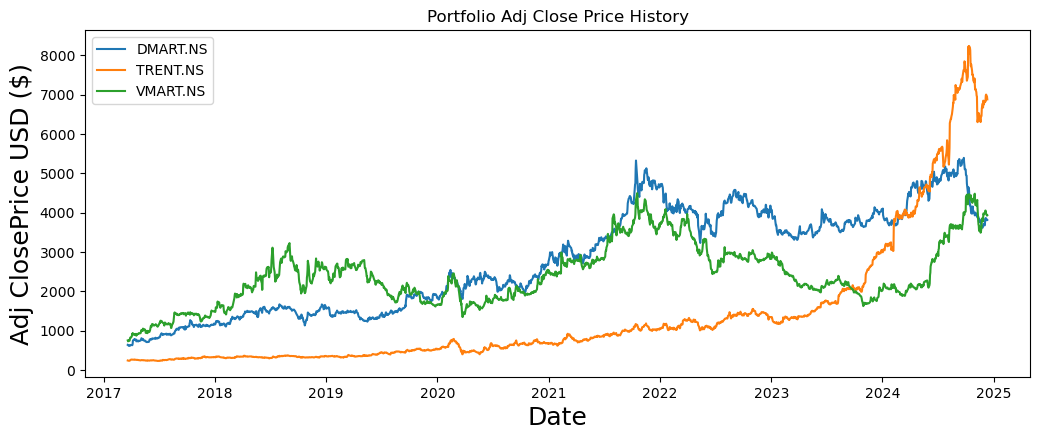

In [62]:
showGraph(stocksymbols)

In [63]:
daily_simple_returns = my_stocks.pct_change(1)
daily_simple_returns

Ticker,DMART.NS,TRENT.NS,VMART.NS
Date,,,
2017-03-21,NaN,NaN,NaN
2017-03-22,-0.004754,-0.013530,-0.030646
2017-03-23,-0.005794,-0.005527,0.019734
2017-03-24,-0.028274,-0.007410,-0.006763
2017-03-27,-0.004053,-0.003525,0.010180
...,...,...,...
2024-12-04,0.005287,-0.002565,0.013562
2024-12-05,0.003597,0.021440,-0.018079
2024-12-06,-0.015114,0.004283,-0.001495


In [64]:
daily_simple_returns.corr()

Ticker,DMART.NS,TRENT.NS,VMART.NS
Ticker,,,
DMART.NS,1.000000,0.256173,0.221635
TRENT.NS,0.256173,1.000000,0.193743
VMART.NS,0.221635,0.193743,1.000000


In [65]:
daily_simple_returns.cov()

Ticker,DMART.NS,TRENT.NS,VMART.NS
Ticker,,,
DMART.NS,0.000407,0.000116,0.000115
TRENT.NS,0.000116,0.000504,0.000112
VMART.NS,0.000115,0.000112,0.000664


In [66]:
daily_simple_returns.var()

Ticker
DMART.NS    0.000407
TRENT.NS    0.000504
VMART.NS    0.000664
dtype: float64

In [68]:
print("The Stock Volatility:")
daily_simple_returns.std()

The Stock Volatility:


Ticker
DMART.NS    0.020177
TRENT.NS    0.022450
VMART.NS    0.025766
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

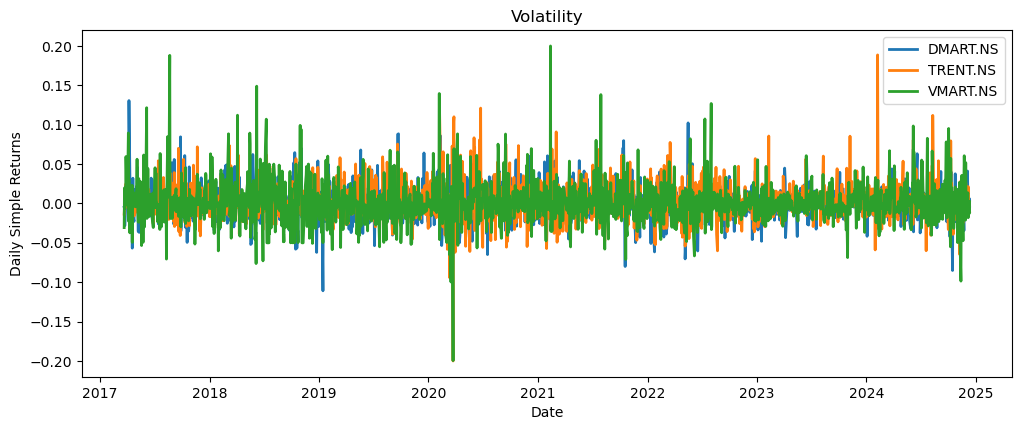

In [69]:
plt.figure(figsize = (12,4.5))
for c in daily_simple_returns.columns.values:
    plt.plot(daily_simple_returns[c], lw = 2, label = c)
    
plt.legend(loc = "upper right", fontsize = 10)
plt.title("Volatility")
plt.ylabel("Daily Simple Returns")
plt.xlabel("Date")
plt.show

In [70]:
dailyMeanSimpleReturn = daily_simple_returns.mean()
print("The Daily Mean Simple Return is:")
print(dailyMeanSimpleReturn)

The Daily Mean Simple Return is:
Ticker
DMART.NS    0.001138
TRENT.NS    0.002003
VMART.NS    0.001194
dtype: float64


In [71]:
randomWeights = np.array([0.5, 0.3, 0.2])
portfolioSimpleReturns = np.sum(randomWeights * dailyMeanSimpleReturn)
print("The Daily Expected Portfolio return is " + str(portfolioSimpleReturns))

The Daily Expected Portfolio return is 0.0014088447083113991


In [72]:
print("Expected Annualised Portfolio Simple Return is " + str(portfolioSimpleReturns * 252))

Expected Annualised Portfolio Simple Return is 0.3550288664944726


In [73]:
dailyCumSimplReturns = (daily_simple_returns + 1).cumprod()
dailyCumSimplReturns

Ticker,DMART.NS,TRENT.NS,VMART.NS
Date,,,
2017-03-21,NaN,NaN,NaN
2017-03-22,0.995246,0.986470,0.969354
2017-03-23,0.989479,0.981018,0.988483
2017-03-24,0.961503,0.973748,0.981798
2017-03-27,0.957606,0.970315,0.991792
...,...,...,...
2024-12-04,6.000780,28.013440,5.382306
2024-12-05,6.022366,28.614040,5.284997
2024-12-06,5.931344,28.736583,5.277099


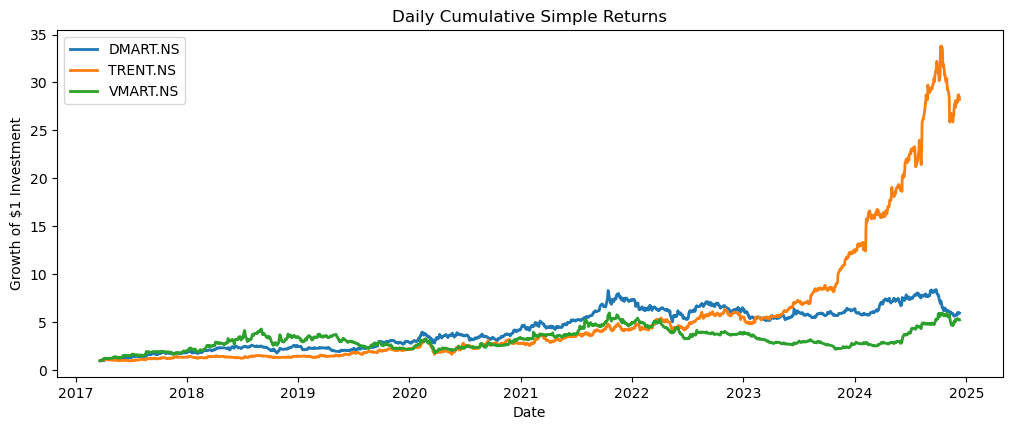

In [74]:
plt.figure(figsize = (12.2,4.5))
for c in dailyCumSimplReturns.columns.values:
    plt.plot(dailyCumSimplReturns.index, dailyCumSimplReturns[c], lw=2, label=c)
    
plt.legend(loc = "upper left", fontsize = 10) 
plt.xlabel("Date")
plt.ylabel("Growth of $1 Investment")
plt.title("Daily Cumulative Simple Returns")
plt.show()

In [75]:
import statsmodels.api as sm

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


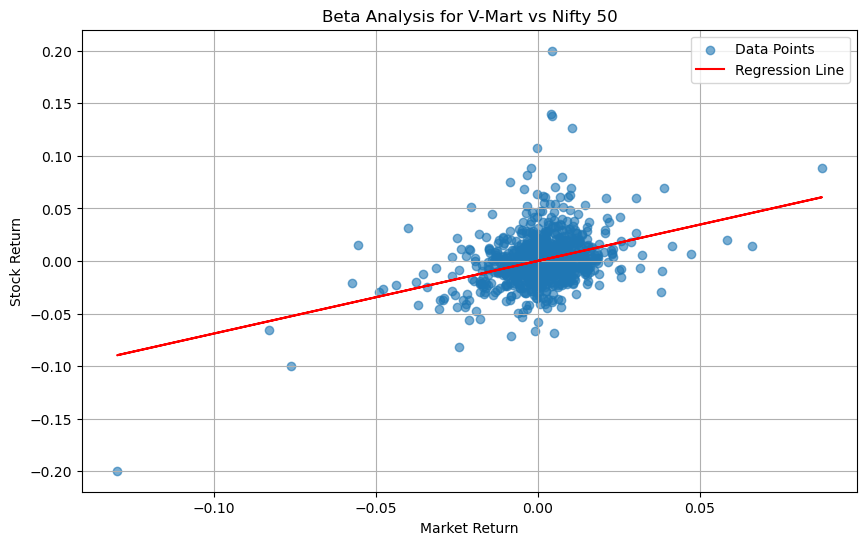

[*********************100%%**********************]  1 of 1 completed


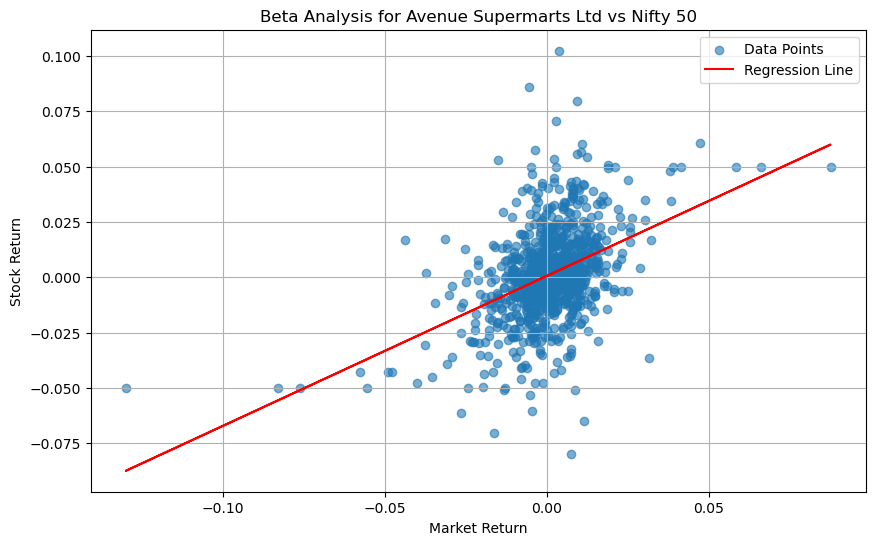

[*********************100%%**********************]  1 of 1 completed


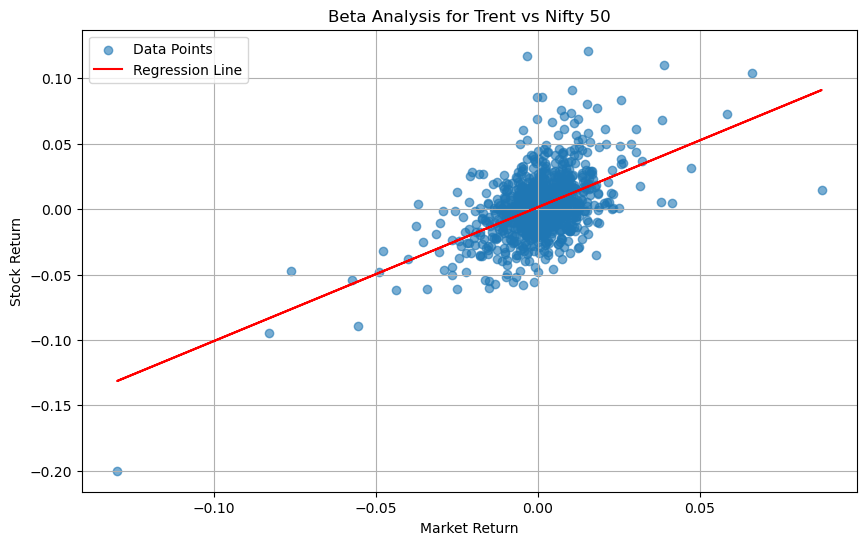

                   Stock      Beta     Alpha
0                 V-Mart  0.691017  0.000013
1  Avenue Supermarts Ltd  0.677551  0.000562
2                  Trent  1.023132  0.001390


In [76]:
# Define stock tickers and the market index ticker
stocks = {
    "V-Mart": "VMART.NS",
    "Avenue Supermarts Ltd": "DMART.NS",
    "Trent": "TRENT.NS"
}
market_index = "^NSEI"  # Nifty 50 index ticker

# Define the time period for analysis
start_date = "2020-01-01"
end_date = "2023-12-31"

# Download historical price data for the stocks and the market index
market_data = yf.download(market_index, start=start_date, end=end_date)
market_data['Market_Return'] = market_data['Adj Close'].pct_change()

results = []

# Loop through each stock for Beta calculation
for stock_name, stock_ticker in stocks.items():
    stock_data = yf.download(stock_ticker, start=start_date, end=end_date)
    stock_data['Stock_Return'] = stock_data['Adj Close'].pct_change()

    # Merge stock and market returns into a single DataFrame
    data = pd.DataFrame({
        'Stock_Return': stock_data['Stock_Return'],
        'Market_Return': market_data['Market_Return']
    }).dropna()

    # Perform linear regression
    X = sm.add_constant(data['Market_Return'])  # Add a constant for the intercept
    y = data['Stock_Return']

    model = sm.OLS(y, X).fit()
    beta = model.params['Market_Return']
    alpha = model.params['const']

    results.append({
        'Stock': stock_name,
        'Beta': beta,
        'Alpha': alpha
    })

    # Plot the regression for each stock
    plt.figure(figsize=(10, 6))
    plt.scatter(data['Market_Return'], data['Stock_Return'], alpha=0.6, label="Data Points")
    plt.plot(data['Market_Return'], alpha + beta * data['Market_Return'], color="red", label="Regression Line")
    plt.title(f"Beta Analysis for {stock_name} vs Nifty 50")
    plt.xlabel("Market Return")
    plt.ylabel("Stock Return")
    plt.legend()
    plt.grid()
    plt.show()

# Display the results
results_df = pd.DataFrame(results)
print(results_df)

In [82]:
# Calculate mean and standard deviation of returns
mean_returns = returns.mean()       # Mean of the returns
std_devs = returns.std()            # Standard deviation of the returns

# Print results
print("Mean Returns:\n", mean_returns)
print("Standard Deviations:\n", std_devs)


Mean Returns:
 Ticker
DMART.NS   -0.000147
TRENT.NS    0.003902
VMART.NS    0.003564
dtype: float64
Standard Deviations:
 Ticker
DMART.NS    0.017334
TRENT.NS    0.023727
VMART.NS    0.024294
dtype: float64


In [ ]:
days = 252
num_simulations = 10000
simulated_prices = np.zeros((days, len(stocks), num_simulations))

for i, stock in enumerate(stocks):
    last_price = data[stock]